# Introduction to Regression with Neural Networks in TensorFlow

 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables. 

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

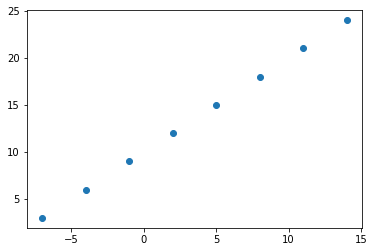

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0 , -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0 ,18.0 ,21.0 ,24.0])

plt.scatter(X,y)

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and ouutput layers, as well as the hidden layers of a deep learning model. 
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is ) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of the model)
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create  a model using the Sequential API
model = tf.keras.Sequential([
            tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for Stocastic Gradient Descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Try and make a prediction using our model 
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

 We can improve our model, by altering the steps we took to create a model 

 1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer. 

 2. **Compliling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function. 

 3. **Fitting a model** - here we might fit a model for mroe **epochs** (leave it training for longer) or on more data (give it more data to learn from)

In [ ]:
# Let's rebuild our model 

# 1. Create the model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 647ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [ ]:
# Try and make a prediction using our model 
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuild our model 

# 1. Create the model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.2),
              metrics= ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 866ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 9.6736 - mae: 9.6736
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 8.7736 - mae: 8.7736
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 7.8736 - mae: 7.8736
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9736 - mae: 6.9736
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7993 - mae: 6.7993
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 7.0556 - mae: 7.0556
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1671 - mae: 7.1671
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1967 - mae: 7.1967
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0619 - mae: 7.0619
Epoch 11/100
1/1 [==============================] - 0s 15ms/step -

In [ ]:
# Try and make a prediction using our model 
y_pred = model.predict([17.0])
y_pred

array([[27.328897]], dtype=float32)

In [ ]:
# Try with more layers
# Let's rebuild our model 

# 1. Create the model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 848ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 

In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[31.727652]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> etc. 
```

When it comes to evaluation... there are 3 words you should memorize: 


> Visualize, Visualize, visualize

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of the model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth? 


In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X +10
y


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

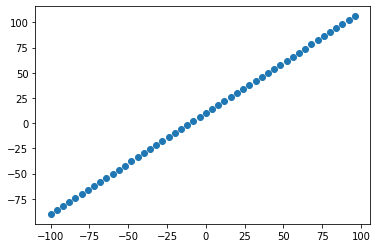

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training set**- the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15%

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets 
X_train = X[:40] # The first 40 samples 
X_test = X[40:] 

y_train = y[:40] 
y_test = y[40:]

### Visualizing the data

Now we've got our data in training and test sets 
let's visualize it again!

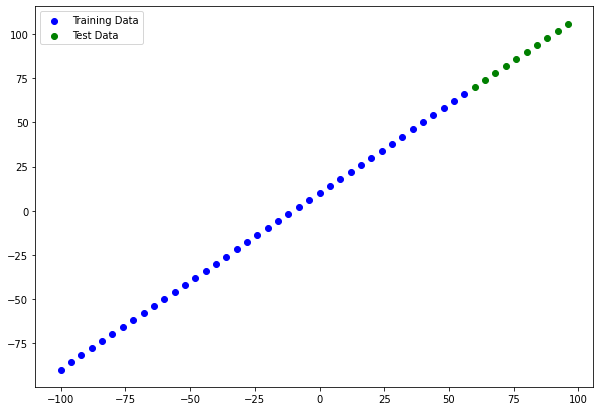

In [ ]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c ='b', label="Training Data")
#Plot test data in green
plt.scatter(X_test, y_test, c='g', label = "Test Data")

plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data 

# 1. Create a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model 
model.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 26.4821 - mae: 26.4821
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5605 - mae: 8.5605
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.7800 - mae: 10.7800
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2395 - mae: 11.2395
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 12.4704 - mae: 12.4704
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 9.6435 - mae: 9.6435
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 8.7477 - mae: 8.7477
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 9.0532 - mae: 9.0532
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.2073 - mae: 19.2073
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 10.3632 - mae: 10.3632
Epoch 11/100
2/2 [==============================] - 0s 23ms/

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total Params - total number of parameters in the model 
* Trainable params - the number of parameters the model can update as it trains
* Non-trainable params - the number of parameters that can not be updated (this is typical when you bring in already learned patterns of parameters from other models during **transfer learning**)

In [ ]:
# Let's fit our model to the trainign data 
model.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs = 100, verbose=0)

In [ ]:
# Get a summary of our model 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


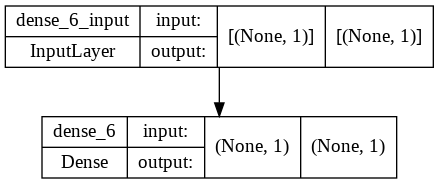

In [ ]:
from tensorflow.keras.utils import plot_model


plot_model(model=model, show_shapes=True)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, name="input_layer"),
                             tf.keras.layers.Dense(1, name ="output_layer")
], name = "model_1")

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Let's fit our model to the trainign data 
model.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs = 100, verbose=0)

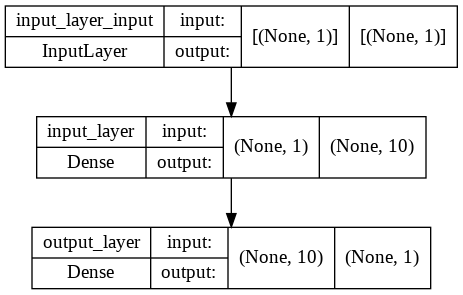

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

OFten you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model)

In [ ]:
# Make some predictions 
y_preds = model.predict(X_test)
y_preds 

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** : if you feel like your going to need to resure some kind of functionality in the future, it is a good idea to make it a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test, 
                     predictions = y_preds):
  """ 
  Plots training  data, test data, and compares predictions to ground truth labels
  """

  plt.figure(figsize =(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label="Test Data")
  # Plot preds in red
  plt.scatter(test_data, predictions, c='r', label= "Predictions")
  # Show the legend
  plt.legend();

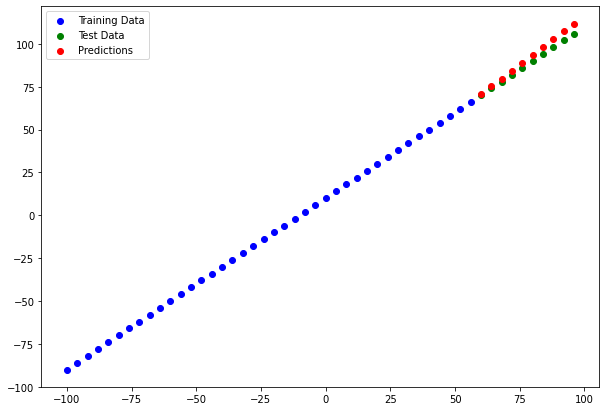

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

### Evaluating our model's predictions with regression evaluatation metrics 

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance

Since we're working on a regression, two of the main metrics:
* MAE- mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average erros", use when larger errors are more significant that smaller errors

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 258ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae_ = tf.metrics.mean_absolute_error(y_test, y_preds)
mae_

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
mae_ = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds))
mae_

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean squared error
mse_ = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))
mse_

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

from tensorflow.python.util import lazy_loader
### Running experiments to improve our model 

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> etc. 
```

How to improve a model
1. Get more  data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs




In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Build model_1
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)


Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/ste

In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


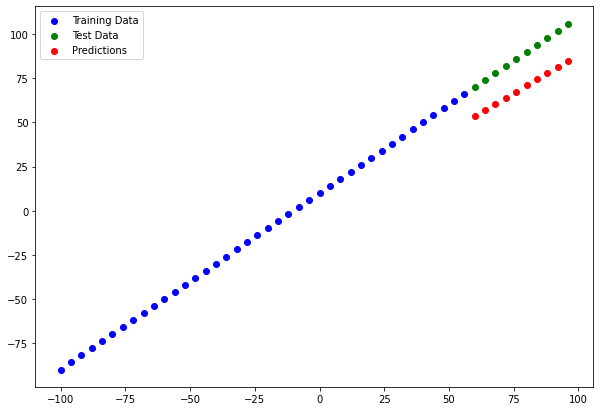

In [ ]:
# Make and plot predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics 
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
# Build model 2 
tf.random.set_seed(42)
# 1. Build model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 55.9581 - mae: 55.9581
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 15.6148 - mae: 15.6148
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 18.3767 - mae: 18.3767
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 13.3871 - mae: 13.3871
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.7253 - mae: 14.7253
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7189 - mae: 11.7189
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0542 - mae: 11.0542
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0407 - mae: 11.0407
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 39.8598 - mae: 39.8598
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 27.3310 - mae: 27.3310
Epoch 11/100
2/2 [==============================] - 0s 

In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


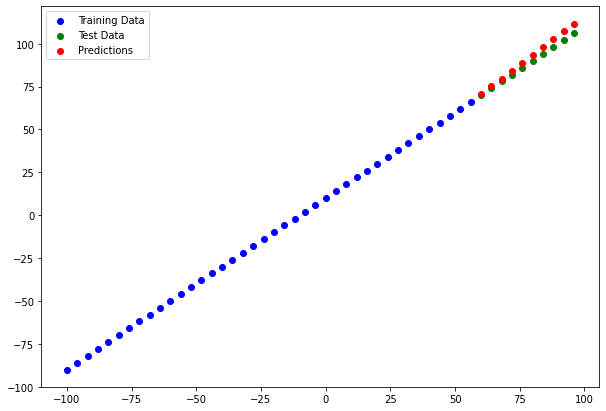

In [ ]:
# Plot predictions of model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.107708>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.474764>)

In [ ]:
# Build model 3 
tf.random.set_seed(42)
# 1. Build the model 
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose =0)

In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


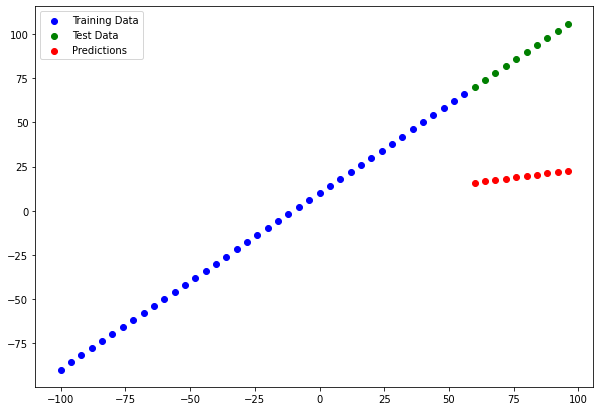

In [ ]:
# Plot evaluations
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparing the results of our experiments

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd 

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["mode_3", mae_3.numpy(), mse_3.numpy()]]
                

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.107708,12.474764
2,mode_3,68.713615,4808.027344


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments
And when doing so, it can be tedious if your running lots of experiments.else

Luckily, there are tools to help us.

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)


## Saving our models

Saving our models allows us to use them outside of Google Collab or wherever they are trained (a web application or mobile app)

There are two main formats we can save our model's to:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save the model using SaveModel
model_2.save("01_tensorflow_regression_model2")

INFO:tensorflow:Assets written to: 01_tensorflow_regression_model2/assets


In [ ]:
# Save model using HDF5 format
model_2.save("01_tensorflow_regression_model2_HDF5.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format 
loaded_SavedModel_format = tf.keras.models.load_model("01_tensorflow_regression_model2")

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("01_tensorflow_regression_model2_HDF5.h5")

In [ ]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

There are 2 ways 
1. You can go to the "files" tab and right click on the file you're after and click "Download"
2. Use code (see the cell below)
3. You can save it to Google Drive and copy it there. 

# Download a file from google collab


In [ ]:
from google.colab import files
#files.download("/01_tensorflow_regression_model2_HDF5.h5") 

In [ ]:
# Save a file from Google collab to Google drive
#!cp /content/01_tensorflow_regression_model2_HDF5.h5 /contente/drive/MyDrive/folder

## A Larger Example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Import dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Use One hot encoding to change object varaibles into numbers
insuarance_one_hot = pd.get_dummies(insurance)
insuarance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insuarance_one_hot.drop("charges", axis = 1)
y = insuarance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# SPlit into training and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.8, random_state = 42)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1069,54,31.900,1,1,0,1,0,0,0,1,0
476,24,28.500,0,0,1,0,1,1,0,0,0
157,18,25.175,0,0,1,0,1,1,0,0,0
16,52,30.780,1,1,0,1,0,1,0,0,0
1072,21,31.255,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Build a neural network 
tf.random.set_seed(42)

# 1. Create the model
insuarance_model = tf.keras.Sequential([
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insuarance_model.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.SGD(),
                         metrics = ["mae"])

# 3. Fit the model
insuarance_model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 11534.5918 - mae: 11534.5918
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 7690.2651 - mae: 7690.2651
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 7574.1621 - mae: 7574.1621
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 8033.7104 - mae: 8033.7104
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 8361.1992 - mae: 8361.1992
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 7632.7109 - mae: 7632.7109
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 7788.9971 - mae: 7788.9971
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 8144.1284 - mae: 8144.1284
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 7863.6060 - mae: 7863.6060
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 7405.6187 - mae: 7405.6187
Epoch 11/100
9/9 

In [ ]:
insuarance_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                120       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insuarance_model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 1ms/step - loss: 7297.8071 - mae: 7297.8071


[7297.80712890625, 7297.80712890625]

In [ ]:
y_train.median(), y_train.mean()

(8964.06055, 13111.119929887636)

Right now our model isn't performing too well. Let's try and improve it.

To improve our model, we'll run 2 experiments. 
1. Add an extra layer with more hidden units
2. Train for longer
3. (Insert your own model here)

In [ ]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
                                          tf.keras.layers.Dense(100),
                                          tf.keras.layers.Dense(10),
                                          tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs =100, verbose=0)

In [ ]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

34/34 [==============================] - 0s 2ms/step - loss: 6963.1133 - mae: 6963.1133


[6963.11328125, 6963.11328125]

In [ ]:
# Set seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss =tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history =insurance_model_3.fit(X_train, y_train, epochs= 300, verbose =0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

34/34 [==============================] - 0s 3ms/step - loss: 5909.2993 - mae: 5909.2993


[5909.29931640625, 5909.29931640625]

Text(0.5, 0, 'epochs')

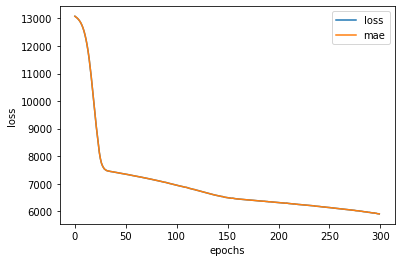

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In [ ]:
# Import dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a few classes from Scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transform
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region", ])
)

# Create X & y
X = insurance.drop("charges", axis= 1)
y = insurance["charges"]

# Build our train and test sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the column transformer to our training data 
ct.fit(X_train)

# Transform training and test data with normalization 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(x_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Set seed 
tf.random.set_seed(42)

# Build model 
insurance_normal = tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])


# Compile Model
insurance_normal.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# Fit the model 
insurance_normal.fit(X_train_normal, y_train, epochs = 300, verbose =0)

In [ ]:
insurance_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3161.5598 - mae: 3161.5598


[3161.559814453125, 3161.559814453125]